In [ ]:
!pip install gradio

ERROR: Operation cancelled by user


In [ ]:
!pip install gradio --quiet


In [ ]:
import gradio as gr
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Generating dummy data
data = {
    "Area (sq ft)": np.random.randint(500, 5000, 100),
    "Bedrooms": np.random.randint(1, 6, 100),
    "Age of House": np.random.randint(1, 50, 100),
    "Price": np.random.randint(50000, 500000, 100)
}
df = pd.DataFrame(data)

# Splitting data
X = df.drop(columns=["Price"])
y = df["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

def predict_price(area, bedrooms, age):
    input_data = np.array([[area, bedrooms, age]])
    input_scaled = scaler.transform(input_data)
    prediction = model.predict(input_scaled)
    return f"Estimated Price: ${prediction[0]:,.2f}"

# Creating Gradio interface
iface = gr.Interface(
    fn=predict_price,
    inputs=[
        gr.Number(label="Area (sq ft)"),
        gr.Number(label="Bedrooms"),
        gr.Number(label="Age of House")
    ],
    outputs=gr.Textbox(label="Predicted House Price")
)

# Running the app
iface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://2951cf51c7e3df3d4c.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Mean Absolute Error: 104469.30
Mean Squared Error: 16904382557.01
Root Mean Squared Error: 130016.85


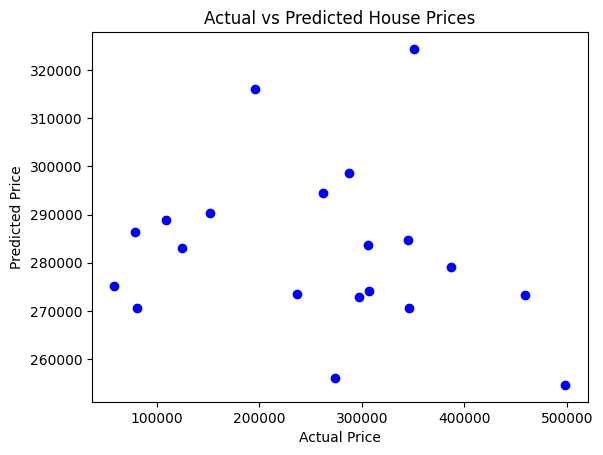

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Generating dummy data
data = {
    "Area (sq ft)": np.random.randint(500, 5000, 100),
    "Bedrooms": np.random.randint(1, 6, 100),
    "Age of House": np.random.randint(1, 50, 100),
    "Price": np.random.randint(50000, 500000, 100)
}
df = pd.DataFrame(data)

# Splitting data
X = df.drop(columns=["Price"])
y = df["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

# Plot actual vs predicted
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()

Mean Absolute Error: 2.96
Mean Squared Error: 16.34
Root Mean Squared Error: 4.04


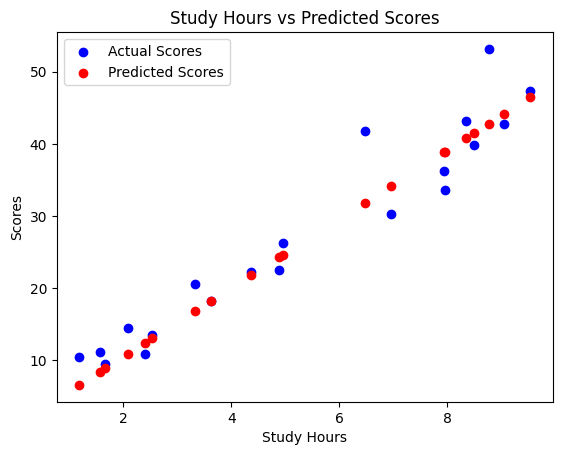

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Generating dummy data
np.random.seed(42)
study_hours = np.random.uniform(1, 10, 100)  # Random study hours between 1 and 10
scores = 5 * study_hours + np.random.normal(0, 5, 100)  # Linear relation with noise

df = pd.DataFrame({"Study Hours": study_hours, "Scores": scores})

# Splitting data
X = df[["Study Hours"]]
y = df["Scores"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

# Plot actual vs predicted
plt.scatter(X_test, y_test, color='blue', label="Actual Scores")
plt.scatter(X_test, y_pred, color='red', label="Predicted Scores")
plt.xlabel("Study Hours")
plt.ylabel("Scores")
plt.title("Study Hours vs Predicted Scores")
plt.legend()
plt.show()


In [ ]:
import gradio as gr
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Generating synthetic data
data = {
    "Rainfall (mm)": np.random.uniform(50, 300, 100),
    "Temperature (°C)": np.random.uniform(15, 40, 100),
    "Humidity (%)": np.random.uniform(30, 90, 100),
    "Crop Yield (tons/ha)": np.random.uniform(1, 10, 100)  # Target variable
}
df = pd.DataFrame(data)

# Splitting data
X = df.drop(columns=["Crop Yield (tons/ha)"])
y = df["Crop Yield (tons/ha)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

def predict_yield(rainfall, temperature, humidity):
    input_data = np.array([[rainfall, temperature, humidity]])
    input_scaled = scaler.transform(input_data)
    prediction = model.predict(input_scaled)
    return f"Predicted Crop Yield: {prediction[0]:.2f} tons/ha"

# Creating Gradio interface
iface = gr.Interface(
    fn=predict_yield,
    inputs=[
        gr.Number(label="Rainfall (mm)"),
        gr.Number(label="Temperature (°C)"),
        gr.Number(label="Humidity (%)")
    ],
    outputs=gr.Textbox(label="Predicted Crop Yield")
)

# Running the app
iface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ec61c4c64ae5c9f66d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import gradio as gr
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Generating synthetic data
data = {
    "Rainfall (mm)": np.random.uniform(50, 300, 100),
    "Temperature (°C)": np.random.uniform(15, 40, 100),
    "Humidity (%)": np.random.uniform(30, 90, 100),
    "Crop Yield (tons/ha)": np.random.uniform(1, 10, 100)  # Target variable
}
df = pd.DataFrame(data)

# Splitting data
X = df.drop(columns=["Crop Yield (tons/ha)"])
y = df["Crop Yield (tons/ha)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training Decision Tree model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

def predict_yield(rainfall, temperature, humidity):
    input_data = np.array([[rainfall, temperature, humidity]])
    prediction = model.predict(input_data)
    return f"Predicted Crop Yield: {prediction[0]:.2f} tons/ha"

# Creating Gradio interface
iface = gr.Interface(
    fn=predict_yield,
    inputs=[
        gr.Number(label="Rainfall (mm)"),
        gr.Number(label="Temperature (°C)"),
        gr.Number(label="Humidity (%)")
    ],
    outputs=gr.Textbox(label="Predicted Crop Yield")
)

# Running the app
iface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://873e953b5b0acab769.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import gradio as gr
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Generating synthetic data
data = {
    "Income ($)": np.random.randint(20000, 100000, 100),
    "Credit Score": np.random.randint(300, 850, 100),
    "Loan Amount ($)": np.random.randint(5000, 50000, 100),
    "Loan Approved": np.random.choice([0, 1], 100)  # 0 = No, 1 = Yes
}
df = pd.DataFrame(data)

# Splitting data
X = df.drop(columns=["Loan Approved"])
y = df["Loan Approved"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training Decision Tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

def predict_loan(income, credit_score, loan_amount):
    input_data = np.array([[income, credit_score, loan_amount]])
    prediction = model.predict(input_data)
    return "Approved" if prediction[0] == 1 else "Not Approved"

# Creating Gradio interface
iface = gr.Interface(
    fn=predict_loan,
    inputs=[
        gr.Number(label="Income ($)"),
        gr.Number(label="Credit Score"),
        gr.Number(label="Loan Amount ($)")
    ],
    outputs=gr.Textbox(label="Loan Decision")
)

# Running the app
iface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://311976fb26d33139b9.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import gradio as gr
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Generating synthetic data
data = {
    "Marks": np.random.uniform(0, 100, 100),
    "Grade": np.random.uniform(0, 10, 100)  # Assuming a 10-point grading scale
}
df = pd.DataFrame(data)

# Splitting data
X = df[["Marks"]]
y = df["Grade"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

def predict_grade(marks):
    input_data = np.array([[marks]])
    prediction = model.predict(input_data)
    return f"Predicted Grade: {prediction[0]:.2f}"  # Returns predicted grade

# Creating Gradio interface
iface = gr.Interface(
    fn=predict_grade,
    inputs=[gr.Number(label="Marks")],
    outputs=gr.Textbox(label="Predicted Grade")
)

# Running the app
iface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://14cb1b4a52ab904f7a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import gradio as gr
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Generating synthetic data
data = {
    "Marks": np.random.uniform(0, 100, 100),
    "Pass/Fail": np.random.choice([0, 1], 100)  # 0 = Fail, 1 = Pass
}
df = pd.DataFrame(data)

# Splitting data
X = df[["Marks"]]
y = df["Pass/Fail"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

def predict_pass_fail(marks):
    input_data = np.array([[marks]])
    prediction = model.predict(input_data)
    return "Pass" if prediction[0] == 1 else "Fail"

# Creating Gradio interface
iface = gr.Interface(
    fn=predict_pass_fail,
    inputs=[gr.Number(label="Marks")],
    outputs=gr.Textbox(label="Result")
)

# Running the app
iface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://025d877662a417aab4.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import gradio as gr
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Generating synthetic data
data = {
    "Area (sq ft)": np.random.randint(500, 5000, 100),
    "Bedrooms": np.random.randint(1, 5, 100),
    "Location Rating": np.random.randint(1, 10, 100),  # 1 (worst) to 10 (best)
    "Price Category": np.random.choice([0, 1], 100)  # 0 = Affordable, 1 = Expensive
}
df = pd.DataFrame(data)

# Splitting data
X = df.drop(columns=["Price Category"])
y = df["Price Category"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

def predict_price_category(area, bedrooms, location_rating):
    input_data = np.array([[area, bedrooms, location_rating]])
    prediction = model.predict(input_data)
    return "Expensive" if prediction[0] == 1 else "Affordable"

# Creating Gradio interface
iface = gr.Interface(
    fn=predict_price_category,
    inputs=[
        gr.Number(label="Area (sq ft)"),
        gr.Number(label="Bedrooms"),
        gr.Number(label="Location Rating (1-10)")
    ],
    outputs=gr.Textbox(label="House Category")
)

# Running the app
iface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://acb4ddb1e67abbf8e0.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
pip install diffusers transformers torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 21.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlink

In [ ]:
from diffusers import StableDiffusionPipeline
import torch

# Load the pre-trained Stable Diffusion model
pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")
pipe.to("cuda" if torch.cuda.is_available() else "cpu")

# Generate an image based on text input
prompt = "A futuristic city at sunset with flying cars"
image = pipe(prompt).images[0]

# Save and show the generated image
image.save("generated_image.png")
image.show()


KeyboardInterrupt: 

In [ ]:
import gradio as gr
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Generating synthetic data
data = {
    "Glucose Level": np.random.randint(70, 200, 100),
    "BMI": np.random.uniform(18, 40, 100),
    "Age": np.random.randint(20, 80, 100),
    "Diabetes": np.random.choice([0, 1], 100)  # 0 = No, 1 = Yes
}
df = pd.DataFrame(data)

# Splitting data
X = df.drop(columns=["Diabetes"])
y = df["Diabetes"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training Decision Tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

def predict_diabetes(glucose, bmi, age):
    input_data = np.array([[glucose, bmi, age]])
    prediction = model.predict(input_data)
    return "Diabetic" if prediction[0] == 1 else "Not Diabetic"

# Creating Gradio interface
iface = gr.Interface(
    fn=predict_diabetes,
    inputs=[
        gr.Number(label="Glucose Level"),
        gr.Number(label="BMI"),
        gr.Number(label="Age")
    ],
    outputs=gr.Textbox(label="Diabetes Prediction")
)

# Running the app
iface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://2f1b3beac2a0f08bc5.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import gradio as gr
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Generating synthetic data
data = {
    "Age": np.random.randint(18, 40, 100),
    "Income (in $1000s)": np.random.randint(20, 150, 100),
    "Job Stability (Years)": np.random.randint(0, 15, 100),
    "Marriage Eligibility": np.random.choice([0, 1], 100)  # 0 = Not Eligible, 1 = Eligible
}
df = pd.DataFrame(data)

# Splitting data
X = df.drop(columns=["Marriage Eligibility"])
y = df["Marriage Eligibility"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training Decision Tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

def predict_marriage_eligibility(age, income, job_stability):
    input_data = np.array([[age, income, job_stability]])
    prediction = model.predict(input_data)
    return "Eligible for Marriage" if prediction[0] == 1 else "Not Eligible for Marriage"

# Creating Gradio interface
iface = gr.Interface(
    fn=predict_marriage_eligibility,
    inputs=[
        gr.Number(label="Age"),
        gr.Number(label="Income (in $1000s)"),
        gr.Number(label="Job Stability (Years)")
    ],
    outputs=gr.Textbox(label="Marriage Eligibility")
)

# Running the app
iface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d3beb9635cf1243f17.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import pandas as pd

# Sample structured data (CSV format)
data = {
    "ID": [1, 2, 3, 4, 5],
    "Name": ["Alice", "Bob", "Charlie", "David", "Eve"],
    "Age": [25, 30, 35, 40, 22],
    "Salary": [50000, 60000, 70000, 80000, 55000]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Display first few rows
print("Dataset:\n", df)

# Basic Data Analysis
print("\nSummary Statistics:\n", df.describe())

# Filter: Find employees with salary > 60,000
high_salary = df[df["Salary"] > 60000]
print("\nEmployees with Salary > 60000:\n", high_salary)

# Save to CSV
df.to_csv("structured_data.csv", index=False)
print("\nData saved to structured_data.csv")


Dataset:
    ID     Name  Age  Salary
0   1    Alice   25   50000
1   2      Bob   30   60000
2   3  Charlie   35   70000
3   4    David   40   80000
4   5      Eve   22   55000

Summary Statistics:
              ID        Age        Salary
count  5.000000   5.000000      5.000000
mean   3.000000  30.400000  63000.000000
std    1.581139   7.300685  12041.594579
min    1.000000  22.000000  50000.000000
25%    2.000000  25.000000  55000.000000
50%    3.000000  30.000000  60000.000000
75%    4.000000  35.000000  70000.000000
max    5.000000  40.000000  80000.000000

Employees with Salary > 60000:
    ID     Name  Age  Salary
2   3  Charlie   35   70000
3   4    David   40   80000

Data saved to structured_data.csv


In [ ]:
import spacy

# Load English NLP model
nlp = spacy.load("en_core_web_sm")

# Sample unstructured text data
text = """Elon Musk is the CEO of Tesla and SpaceX.
          He was born in South Africa and later moved to the United States.
          Tesla's headquarters is in California, and it is a leader in electric vehicle production."""

# Process text with NLP
doc = nlp(text)

# Extract Named Entities (People, Organizations, Locations, etc.)
print("Named Entities:")
for ent in doc.ents:
    print(f"{ent.text} - {ent.label_}")

# Extract Keywords (Nouns)
print("\nKeywords:")
keywords = [token.text for token in doc if token.is_alpha and token.pos_ in ["NOUN", "PROPN"]]
print(", ".join(set(keywords)))


Named Entities:
Elon Musk - PERSON
Tesla - ORG
South Africa - GPE
the United States - GPE
Tesla - ORG
California - GPE

Keywords:
California, leader, Musk, headquarters, States, Elon, Africa, Tesla, CEO, vehicle, South, production, United


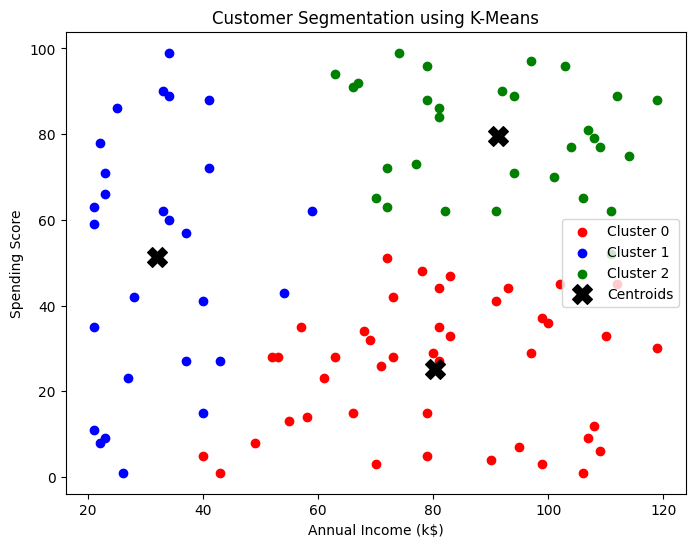

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Generate synthetic customer data (Annual Income & Spending Score)
np.random.seed(42)
customer_data = pd.DataFrame({
    "Annual Income (k$)": np.random.randint(20, 120, 100),
    "Spending Score": np.random.randint(1, 100, 100)
})

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
customer_data["Cluster"] = kmeans.fit_predict(customer_data)

# Plot clusters
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green']
for i in range(3):
    cluster = customer_data[customer_data["Cluster"] == i]
    plt.scatter(cluster["Annual Income (k$)"], cluster["Spending Score"],
                color=colors[i], label=f"Cluster {i}")

# Plot cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            color="black", marker="X", s=200, label="Centroids")

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.title("Customer Segmentation using K-Means")
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import gradio as gr
from sklearn.cluster import KMeans

# Generate synthetic house data
np.random.seed(42)
data = {
    "Size (sq ft)": np.random.randint(800, 4000, 100),
    "Bedrooms": np.random.randint(1, 6, 100),
    "Location Score": np.random.randint(1, 10, 100),  # Higher = better location
    "Price (k$)": np.random.randint(100, 800, 100)  # Price in $1000s
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Selecting features
X = df[["Size (sq ft)", "Bedrooms", "Location Score"]]

# Apply K-Means (3 price categories: Low, Medium, High)
kmeans = KMeans(n_clusters=3, random_state=42)
df["Price Category"] = kmeans.fit_predict(X)

# Function for prediction
def predict_price_category(size, bedrooms, location_score):
    input_data = np.array([[size, bedrooms, location_score]])
    cluster = kmeans.predict(input_data)[0]

    if cluster == 0:
        return "Low Price Range (100k-300k)"
    elif cluster == 1:
        return "Medium Price Range (300k-500k)"
    else:
        return "High Price Range (500k-800k)"

# Create Gradio Interface
iface = gr.Interface(
    fn=predict_price_category,
    inputs=[
        gr.Number(label="Size (sq ft)"),
        gr.Number(label="Number of Bedrooms"),
        gr.Number(label="Location Score (1-10)")
    ],
    outputs=gr.Textbox(label="Predicted Price Range"),
)

# Launch Gradio App
iface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://7ed2bca6fa85ac8872.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
